Taller: Adquisición, procesamiento y visualización de datos (Importar Archivo)

In [45]:
#importaciones
import pandas as pd

# Ruta al archivo Excel
ruta_excel = r"C:\Users\Dc\Documents\Maestría_Data_Science\Fundamentos_Ciencia_Datos\Clase_09_04_2025\Online_Retail.xlsx"

# Leer el archivo Excel
try:
    df = pd.read_excel(ruta_excel)
    print("Archivo cargado correctamente:")
    print(df.head())
except FileNotFoundError:
    print("Error: No se encontró el archivo en la ruta especificada.")
except Exception as e:
    print(f"Ocurrió un error al leer el archivo: {e}")

Archivo cargado correctamente:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


Limpieza de Datos

In [46]:
df = pd.read_excel(ruta_excel) 
## 1. Exploración inicial
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [48]:
# Limpieza de datos en un DataFrame de pandas

import pandas as pd
df = pd.read_excel(ruta_excel)

## 1. Exploración inicial
print("Información del DataFrame:")
print(df.info())

print("\nPrimeras filas:")
print(df.head())

print("\nEstadísticas descriptivas:")
print(df.describe(include='all'))

## 2. Manejo de valores faltantes
# Opciones para tratar NaN:
# a) Eliminar filas con valores faltantes
#df_clean = df.dropna()
# Eliminar filas donde TODAS las columnas son NaN
df = df.dropna(how='all')
# Eliminar filas donde ALGUNA columna tiene NaN (más común)
#df = df.dropna()
# Eliminar filas donde NaN aparece en columnas específicas
columnas_relevantes = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'Country']
df = df.dropna(subset=columnas_relevantes)
# Eliminar filas donde Quantity o UnitPrice sean cero (además de NaN)
df = df[(df['Quantity'] != 0) & (df['UnitPrice'] != 0)]

# b) Rellenar con valor específico (ej. 0 o 'Desconocido')
df_filled = df.fillna({
    'Quantity': 0,
    'Country': 'Desconocido'
})

# c) Rellenar con la media o mediana (para columnas numéricas)
df['UnitPrice'] = df['UnitPrice'].fillna(df['UnitPrice'].mean())
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].mean())

# d) Rellenar con la moda (para columnas categóricas)   
df['Country'] = df['Country'].fillna(df['Country'].mode()[0])

## 4. Eliminar filas duplicadas
df = df.drop_duplicates()

## 5. Normalización de texto
# a) Convertir a minúsculas
df['Description'] = df['Description'].str.lower()

# b) Eliminar espacios en blanco
df['Description'] = df['Description'].str.strip()

## 6. Corrección de tipos de datos
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')

## 7. Filtrado de outliers (para columnas numéricas)
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['Quantity'] < (Q1 - 1.5 * IQR)) | 
          (df['UnitPrice'] > (Q3 + 1.5 * IQR)))]

# Crear la nueva columna 'TotalPrice'
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

## 8. Guardar el DataFrame limpio
ruta_salida = r"C:\Users\Dc\Documents\Maestría_Data_Science\Fundamentos_Ciencia_Datos\Clase_09_04_2025\archivo_limpio_12_04_2025.xlsx"
df.to_excel(ruta_salida, index=False)

print("\n¡Limpieza completada! Archivo guardado en:", ruta_salida)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None

Primeras filas:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEA

Carga Nuevo Data Frame Limpio

In [49]:
# Ruta al archivo Excel
ruta_excel_1 = r"C:\Users\Dc\Documents\Maestría_Data_Science\Fundamentos_Ciencia_Datos\Clase_09_04_2025\archivo_limpio_12_04_2025.xlsx"
df_1 = pd.read_excel(ruta_excel_1)

Lectura y Análisis Data Frame Ajustado(Curado)

In [50]:
# Exploración del DataFrame Depurado o Limpio
print(df_1.head())
print(df_1.info())
print(df_1.describe(include='all'))   

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   white hanging heart t-light holder         6   
1    536365     71053                  white metal lantern         6   
2    536365    84406B       cream cupid hearts coat hanger         8   
3    536365    84029G  knitted union flag hot water bottle         6   
4    536365    84029E       red woolly hottie white heart.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498307 entries, 0 to 498306
Data columns (total 9 columns):
 #   Co

Subir los Datos Limpio a SQL Lite

In [51]:
import sqlite3
import pandas as pd

# 1. Cargar tus datos limpios (ejemplo con CSV)
df_1 = pd.read_excel(ruta_excel_1)

# 2. Conectar a la base de datos SQLite (se crea si no existe)
conn = sqlite3.connect('mi_base_de_datos.db')

# 3. Subir el DataFrame a una nueva tabla
df.to_sql('Tabla_SQL_Datos_Limpio', conn, if_exists='replace', index=False)

# 4. Cerrar la conexión
conn.close()

Verificar Archivo SQL Lite

In [52]:
import sqlite3
import pandas as pd

# Conectar a la base de datos SQLite
conn = sqlite3.connect('mi_base_de_datos.db')

# Ejemplo 1: Consultar todos los datos de una tabla y mostrar los primeros registros
consulta_1 = "SELECT * FROM Tabla_SQL_Datos_Limpio LIMIT 5;"
resultados_1 = pd.read_sql_query(consulta_1, conn)
print(resultados_1)

# Ejemplo 2: Consulta específica (ajusta según tus necesidades)
consulta_2 = "SELECT Quantity, * FROM Tabla_SQL_Datos_Limpio WHERE UnitPrice<2.55;"
resultados_2 = pd.read_sql_query(consulta_2, conn)
print(resultados_2)

# Cerrar la conexión
conn.close()

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   white hanging heart t-light holder         6   
1    536365     71053                  white metal lantern         6   
2    536365    84406B       cream cupid hearts coat hanger         8   
3    536365    84029G  knitted union flag hot water bottle         6   
4    536365    84029E       red woolly hottie white heart.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
        Quantity InvoiceNo StockCode                      Description  \
0              6    536366     22633  

Análisis Gráfico

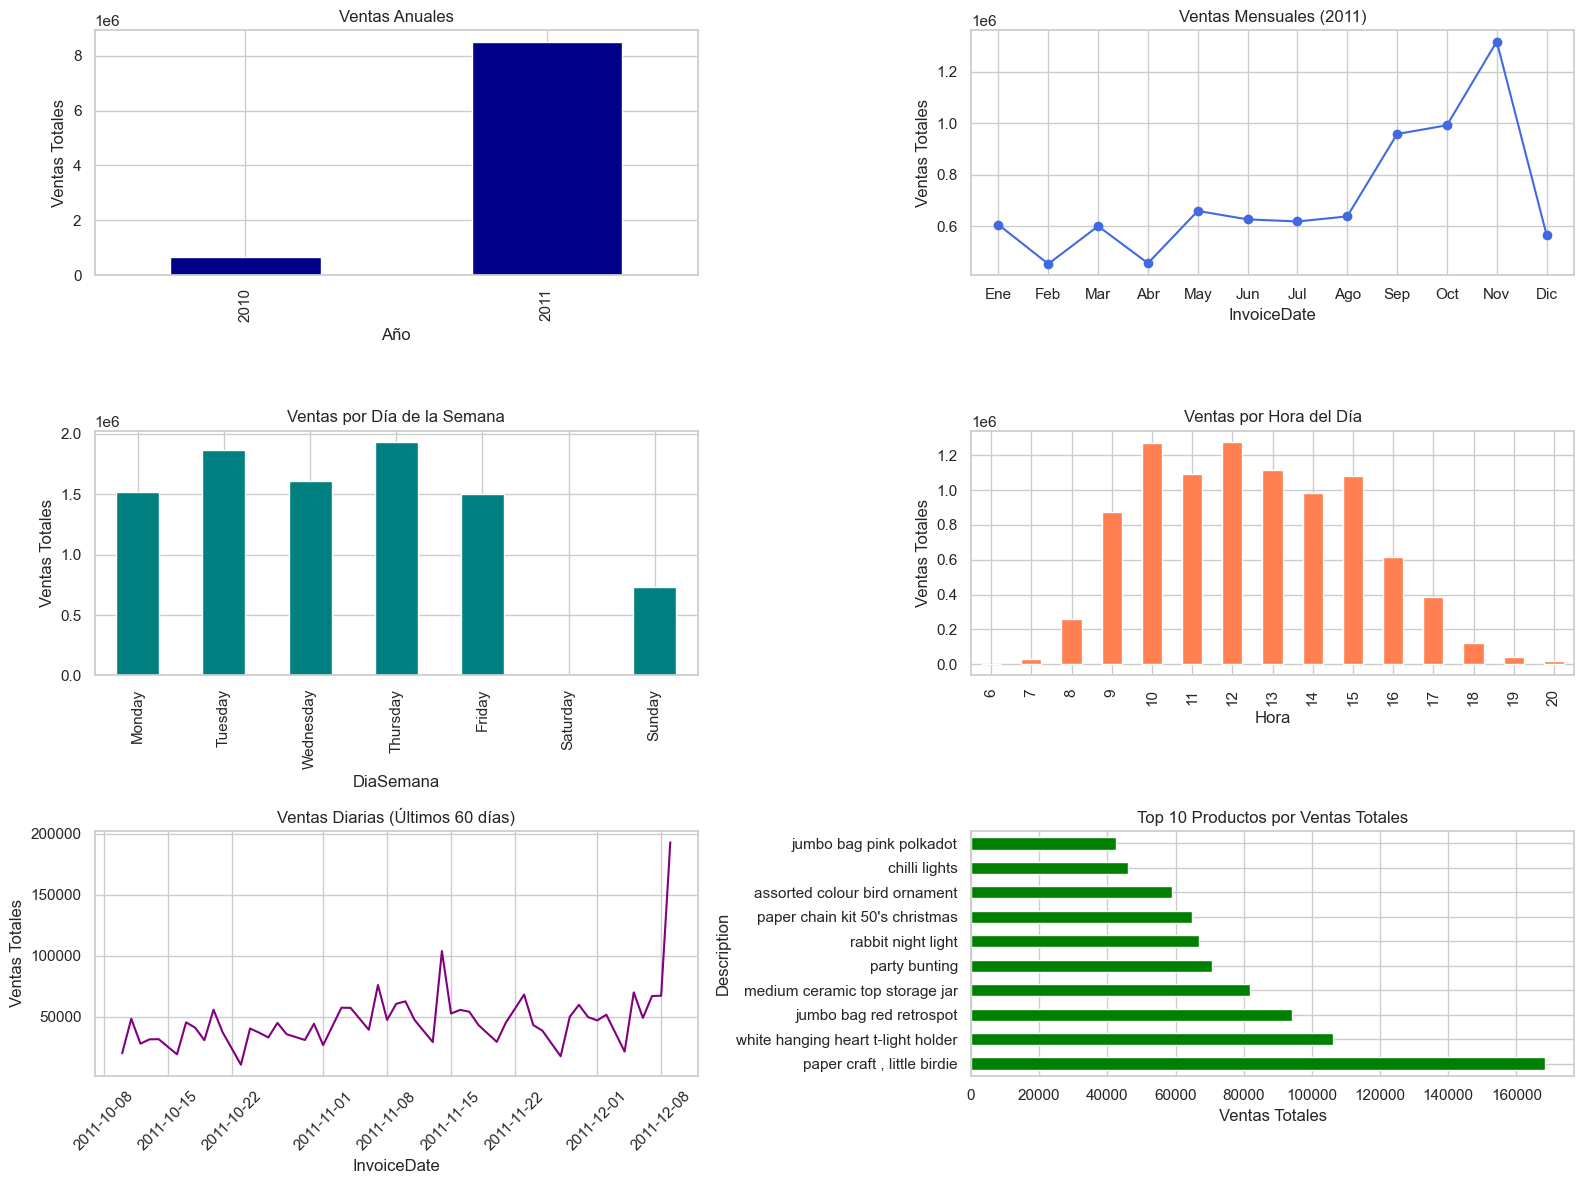

In [53]:
#Librerías necesarias
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Conectar a la base de datos y cargar los datos
conn = sqlite3.connect('mi_base_de_datos.db')
query = """
SELECT 
    InvoiceNo, 
    StockCode, 
    Description, 
    Quantity, 
    InvoiceDate, 
    UnitPrice, 
    Country, 
    (Quantity * UnitPrice) AS TotalPrice 
FROM Tabla_SQL_Datos_Limpio
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Convertir InvoiceDate a formato datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df = df.dropna(subset=['InvoiceDate'])

# Configuración de estilos
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

# 1. VENTAS ANUALES (Nuevo gráfico)
plt.subplot(3, 2, 1)  # Cambiamos a 3 filas para acomodar el nuevo gráfico
df['Año'] = df['InvoiceDate'].dt.year
annual_sales = df.groupby('Año')['TotalPrice'].sum()
annual_sales.plot(kind='bar', color='darkblue')
plt.title('Ventas Anuales')
plt.ylabel('Ventas Totales')
plt.xlabel('Año')

# 2. Ventas mensuales (último año disponible)
plt.subplot(3, 2, 2)
last_year = df['InvoiceDate'].dt.year.max()
monthly_sales = df[df['InvoiceDate'].dt.year == last_year].groupby(
    df['InvoiceDate'].dt.month)['TotalPrice'].sum()
monthly_sales.plot(kind='line', marker='o', color='royalblue')
plt.title(f'Ventas Mensuales ({last_year})')
plt.ylabel('Ventas Totales')
plt.xticks(range(1,13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                        'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# 3. Ventas por día de la semana
plt.subplot(3, 2, 3)
df['DiaSemana'] = df['InvoiceDate'].dt.day_name()
weekday_sales = df.groupby('DiaSemana')['TotalPrice'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
weekday_sales.plot(kind='bar', color='teal')
plt.title('Ventas por Día de la Semana')
plt.ylabel('Ventas Totales')

# 4. Ventas por hora del día
plt.subplot(3, 2, 4)
df['Hora'] = df['InvoiceDate'].dt.hour
hourly_sales = df.groupby('Hora')['TotalPrice'].sum()
hourly_sales.plot(kind='bar', color='coral')
plt.title('Ventas por Hora del Día')
plt.ylabel('Ventas Totales')
plt.xlabel('Hora')

# 5. Ventas diarias (últimos 60 días)
plt.subplot(3, 2, 5)
last_date = df['InvoiceDate'].max()
mask = (df['InvoiceDate'] > (last_date - pd.to_timedelta(60, unit='d')))
daily_sales = df.loc[mask].groupby(df['InvoiceDate'].dt.date)['TotalPrice'].sum()
daily_sales.plot(kind='line', color='purple')
plt.title('Ventas Diarias (Últimos 60 días)')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)

# 6. Top 10 productos más vendidos (por monto)
plt.subplot(3, 2, 6)
top_products = df.groupby('Description')['TotalPrice'].sum().nlargest(10)
top_products.plot(kind='barh', color='green')
plt.title('Top 10 Productos por Ventas Totales')
plt.xlabel('Ventas Totales')

plt.tight_layout()
plt.show()


Análisis con Países

In [54]:
import plotly.express as px

fig = px.choropleth(df.groupby('Country')['TotalPrice'].sum().reset_index(),
                    locations='Country',
                    locationmode='country names',
                    color='TotalPrice',
                    hover_name='Country',
                    title='Ventas Totales por País')
fig.show()

plt.show()

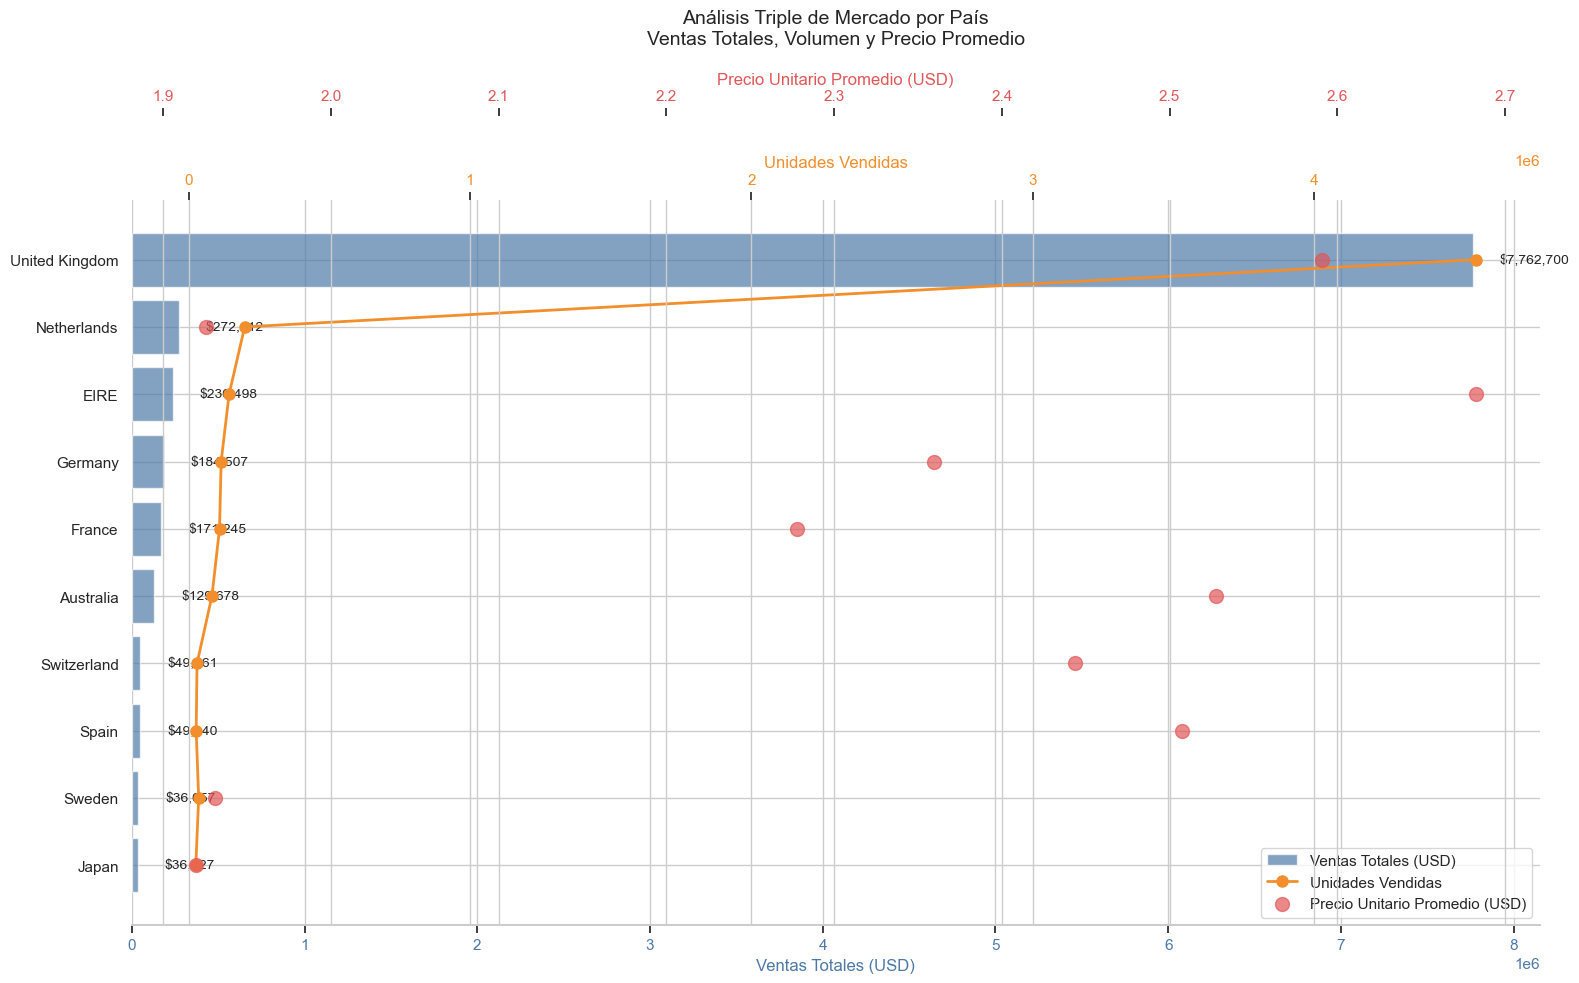

In [55]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración estética
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['axes.titlesize'] = 14
colors = ['#4e79a7', '#f28e2b', '#e15759']  # Azul, naranja, rojo

# 1. Conexión y carga de datos
conn = sqlite3.connect('mi_base_de_datos.db')
query = """
SELECT 
    Country, 
    Quantity, 
    UnitPrice,
    (Quantity * UnitPrice) AS TotalPrice
FROM Tabla_SQL_Datos_Limpio
"""
df = pd.read_sql(query, conn)
conn.close()

# 2. Procesamiento de datos
top_countries = df.groupby('Country')['TotalPrice'].sum().nlargest(10).index
df_top = df[df['Country'].isin(top_countries)]

metrics = df_top.groupby('Country').agg({
    'TotalPrice': 'sum',
    'Quantity': 'sum',
    'UnitPrice': 'mean'
}).sort_values('TotalPrice')

# 3. Gráfico combinado avanzado
fig, ax1 = plt.subplots()

# Barras principales: Ventas totales
bars = ax1.barh(metrics.index, metrics['TotalPrice'], 
                color=colors[0], alpha=0.7, label='Ventas Totales (USD)')

# Añadir etiquetas de valor a las barras
max_total = metrics['TotalPrice'].max()
for bar in bars:
    width = bar.get_width()
    ax1.text(width + max_total*0.02, bar.get_y() + bar.get_height()/2,
             f'${width:,.0f}',
             ha='left', va='center', fontsize=10)

# Línea de unidades vendidas (eje superior)
ax2 = ax1.twiny()
ax2.plot(metrics['Quantity'], metrics.index, 
         marker='o', color=colors[1], linewidth=2,
         markersize=8, label='Unidades Vendidas')

# Puntos para precio promedio (eje superior)
ax3 = ax1.twiny()
scatter = ax3.scatter(metrics['UnitPrice'], metrics.index,
                     color=colors[2], s=100, alpha=0.7,
                     label='Precio Unitario Promedio (USD)')

# Configuración de ejes
ax1.set_xlabel('Ventas Totales (USD)', color=colors[0])
ax1.tick_params(axis='x', labelcolor=colors[0])
ax2.set_xlabel('Unidades Vendidas', color=colors[1])
ax2.tick_params(axis='x', labelcolor=colors[1])
ax3.set_xlabel('Precio Unitario Promedio (USD)', color=colors[2])
ax3.tick_params(axis='x', labelcolor=colors[2])

# Ajustar posición del tercer eje
ax3.spines['top'].set_position(('outward', 60))

# Leyenda unificada
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, 
           loc='lower right', frameon=True)

# Título y ajustes finales
plt.title('Análisis Triple de Mercado por País\nVentas Totales, Volumen y Precio Promedio', pad=20)
sns.despine(left=True)
plt.tight_layout()
plt.show()